# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


In [305]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft, fftfreq
from scipy.signal import find_peaks
from numpy import nan



data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape



(101, 501)

We loaded the packs, functions and data necessary for doing this task.

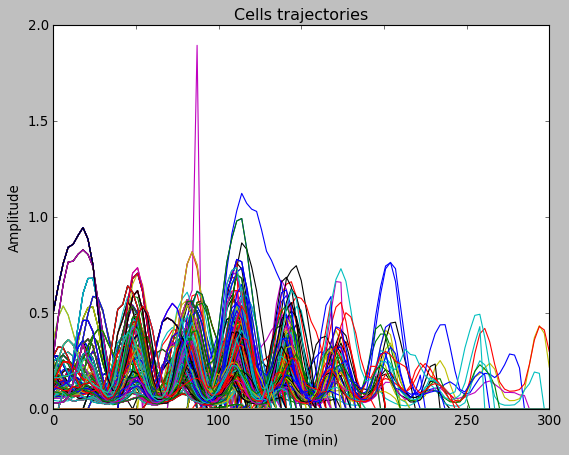

In [298]:
# Plotting (with labels) example cell trajectories
plotter.plot(time,x[:,:])
plotter.title("Cells trajectories")
plotter.xlabel("Time (min)")
plotter.ylabel("Amplitude");
#time.shape

In [177]:
# Finding peaks in each trajectories usin scipy library functions
peaks=[]
for i in range(0, 500):
    peaks_finder = find_peaks(x[:,i])
    peaks.append(peaks_finder[0])
#peaks

To find the peaks we developed a loop to search for the indexes of the maximums of each cell trajectory, using the command find_peaks. After that we added each peak from each cell into a list.

In [190]:
# Calculating amplitude and period of oscillations
amplitude = []
for i in range(0,500):
    fluorescence = x[peaks[i], i]
    amplitude.append(fluorescence)
amplitude

[array([0.20912455, 0.11654549, 0.34739995, 0.32897025, 0.08406143]),
 array([0.46135598, 0.14907495, 0.35601946, 0.43592348, 0.05847783]),
 array([0.3009476 , 0.13302727, 0.23605567, 0.4368582 , 0.34535627,
        0.14280022]),
 array([0.35456353]),
 array([], dtype=float64),
 array([0.14192905, 0.08626089, 0.28164442, 0.33217028, 0.30972232,
        0.1197621 ]),
 array([0.16296327]),
 array([0.1758425 , 0.06540583, 0.18957792, 0.19453902, 0.08227695,
        0.11098527]),
 array([0.23112172, 0.42886717, 0.29841243, 0.53999387, 0.48834663]),
 array([0.10979867, 0.25762682, 0.23453471, 0.23998152]),
 array([0.11751272, 0.30569894]),
 array([0.27386691]),
 array([0.21297613]),
 array([0.0602926 , 0.32000313, 0.17595769]),
 array([0.10630611, 0.47058191, 0.24531329]),
 array([0.17527033, 0.38132583, 0.37507721, 0.15879623, 0.22222428]),
 array([0.0602926 , 0.32000313, 0.17595769]),
 array([0.10630611, 0.47058191, 0.45149026, 0.20072009, 0.26985064]),
 array([0.35822552, 0.44595113, 0.3

To get the value for the amplitude from the peak values, we created a loop to transform the index of the peak in its value. After that we added each amplitude value into a new list.

In [242]:
periods = []
for i in range(0,500):
    time = np.diff(peaks[i])*3
    periods.append(time)
periods

[array([15, 18, 39, 18]),
 array([33, 30, 30, 21]),
 array([30, 27, 30, 33, 30]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([15, 27,  6,  6, 24]),
 array([], dtype=int64),
 array([18, 15,  6, 21, 15]),
 array([30, 33, 30, 33]),
 array([21, 39, 15]),
 array([24]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([24, 30]),
 array([30, 33]),
 array([21, 33, 18, 12]),
 array([24, 30]),
 array([30, 36, 27, 27]),
 array([33, 33, 30, 18]),
 array([33, 30]),
 array([21, 33, 33]),
 array([27, 33, 21]),
 array([], dtype=int64),
 array([ 6, 21]),
 array([33, 30, 33, 21]),
 array([24, 18, 15]),
 array([ 6, 30, 33, 30]),
 array([24, 12, 18, 24]),
 array([18, 30, 24]),
 array([15, 21, 33]),
 array([24]),
 array([36, 33,  9]),
 array([21, 30, 33]),
 array([ 6, 30, 36]),
 array([27, 33]),
 array([], dtype=int64),
 array([15, 27, 27, 33, 21]),
 array([36, 39]),
 array([18, 42]),
 array([], dtype=int64),
 array([15, 27,  6,  6, 24]),
 array([36, 39, 33]),
 array([39, 36, 33, 30])

To get the period values, we substracted all the peaks indexes from each cell and then multiplied them by three, as the time was measured each three minutes. After that we added each period into a new list.

In [213]:
period_means = []
amplitude_means = []
for i in range(0, 500):
    mean1 = np.nanmean(periods[i])
    mean2 = np.nanmean(amplitude[i])
    period_means.append(mean1)
    amplitude_means.append(mean2)
period_means
amplitude_means

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


[22.5,
 28.5,
 30.0,
 nan,
 nan,
 15.6,
 nan,
 15.0,
 31.5,
 25.0,
 24.0,
 nan,
 nan,
 27.0,
 31.5,
 21.0,
 27.0,
 30.0,
 28.5,
 31.5,
 29.0,
 27.0,
 nan,
 13.5,
 29.25,
 19.0,
 24.75,
 19.5,
 24.0,
 23.0,
 24.0,
 26.0,
 28.0,
 24.0,
 30.0,
 nan,
 24.6,
 37.5,
 30.0,
 nan,
 15.6,
 36.0,
 34.5,
 39.0,
 nan,
 24.0,
 27.0,
 25.285714285714285,
 26.142857142857142,
 28.5,
 25.0,
 24.0,
 15.6,
 20.0,
 20.25,
 30.0,
 27.0,
 30.0,
 31.5,
 nan,
 18.0,
 27.0,
 39.0,
 30.0,
 nan,
 nan,
 27.0,
 32.0,
 28.0,
 26.0,
 30.75,
 27.0,
 21.0,
 19.5,
 31.0,
 30.0,
 34.0,
 29.0,
 30.0,
 nan,
 22.5,
 26.0,
 27.0,
 27.0,
 30.75,
 27.0,
 32.0,
 26.25,
 nan,
 27.0,
 23.0,
 30.0,
 25.5,
 25.5,
 25.5,
 30.0,
 26.0,
 33.0,
 nan,
 18.75,
 29.0,
 nan,
 25.5,
 27.0,
 31.0,
 33.0,
 35.0,
 30.0,
 24.75,
 26.4,
 nan,
 nan,
 32.0,
 30.0,
 24.0,
 nan,
 24.0,
 29.0,
 32.25,
 40.5,
 24.0,
 22.0,
 27.428571428571427,
 30.0,
 28.0,
 nan,
 nan,
 nan,
 28.0,
 34.0,
 37.0,
 24.75,
 nan,
 23.25,
 22.5,
 18.0,
 25.5,
 21.0,
 30.

Finally, to get the mean period and amplitude, we applied the "np.nanmean" function and put the mean vales of each variable in two different lists.

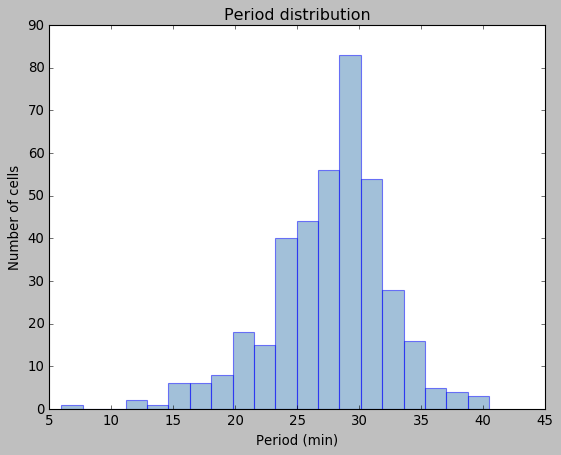

In [297]:
# Drawing histograms of period distribution
plotter.hist(period_means, bins=20, alpha=0.5,
         histtype='bar', color='steelblue',
         edgecolor='b')
plotter.title("Period distribution")
plotter.xlabel('Period (min)')
plotter.ylabel('Number of cells');

To draw an histogram we used the function "plotter.hist" in the list contaning the mean values for the periods.

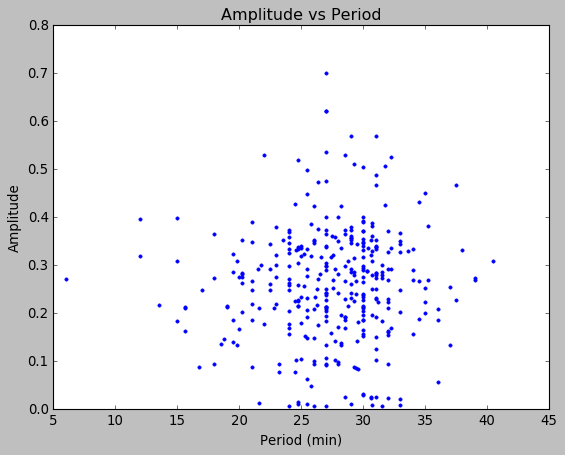

In [311]:
# Plotting amplitude vs period with labels
plotter.plot(period_means, amplitude_means, '.')
plotter.title("Amplitude vs Period")
plotter.xlabel('Period (min)')
plotter.ylabel('Amplitude');

To plot amplitude vs period we used the function "plotter.plot", an respresented it as dots.

In [273]:
#Selecting ten cell trajectiories with the smallest periods and plotting those as a heat map 
smallest_periods = np.argsort(period_means)[:10]
smallest_periods

array([377, 128, 129,   0, 131, 130,   8,   9,  10,   6])

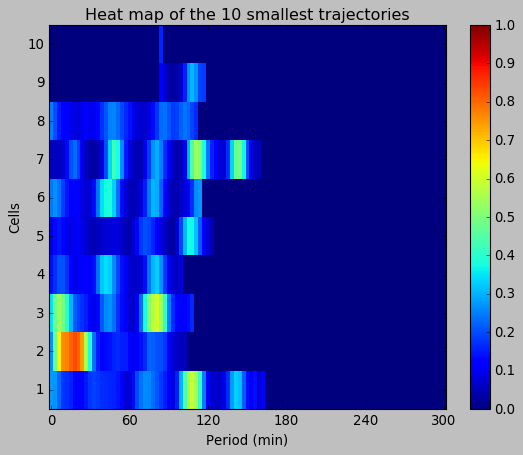

In [300]:
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(x[:, smallest_periods].T, aspect='auto',origin='lower',
           cmap='jet',interpolation="none")
plotter.colorbar()
plotter.clim(0,1)
plotter.yticks(range(0,10),range(1,11))
plotter.xticks(range(0,101,20), range(0,303,60))
plotter.title("Heat map of the 10 smallest trajectories")
plotter.xlabel('Period (min)')
plotter.ylabel('Cells');

To get the 10 cells with the smallest periods we use the function "np.argsort" to order an include the indexes of the 10 smallest mean period values in another list. After that we used that list to plot the heat map using "plot.imshow", and got the heat map of the 10 smallest trajectories.

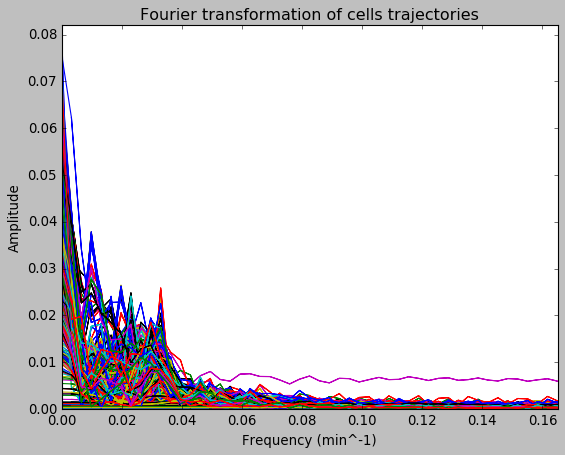

In [316]:
#Performing frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal
N = 501
for i in range(0,500):
    y_transformed = fft(x[:, i])
    x_transformed = np.abs(fftfreq(101,d=3))
    plotter.plot(x_transformed, 2.0/N * np.abs(y_transformed[0:N//2]))
    plotter.title('Fourier transformation of cells trajectories')
    plotter.xlabel('Frequency (min^-1)')
    plotter.ylabel('Amplitude')
    plotter.axis('tight');

To get the Fourier transformation of the cells trajectories we created a loop in wich we transformed component x (amplitude) and y (period) of our data (using the Fourier transformation). Finally, we plotted the transformation, and we are able to perform the frequency analysis.